# Generating Date of doctors with speciality and appointments 

In [2]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import timedelta

# Seed for reproducibility
random.seed(42)

# Function to generate random dates within a given range
def random_dates(start_date, end_date, n=10):
    date_range = end_date - start_date
    random_dates = [start_date + timedelta(days=random.randint(0, date_range.days)) for _ in range(n)]
    return random_dates

# Generate sample data for 100 doctors
fake = Faker()
num_doctors = 100

doctor_ids = list(range(1, num_doctors + 1))
doctor_names = [fake.DoctorName() for _ in range(num_doctors)]
appointment_dates = random_dates(pd.to_datetime('2023-01-01'), pd.to_datetime('2023-12-31'), num_doctors)
specialties = [random.choice(['Cardiology', 'Dermatology', 'Orthopedics', 'Neurology', 'Pediatrics']) for _ in range(num_doctors)]

# Create DataFrame
doctor_data = {
    'DoctorID': doctor_ids,
    'DoctorName': doctor_names,
    'AppointmentDate': appointment_dates,
    'Specialty': specialties
}

doctors_df = pd.DataFrame(doctor_data)

# Display the DataFrame
print(doctors_df.head())


   DoctorID       DoctorName AppointmentDate    Specialty
0         1      Jose Daniel      2023-11-24   Cardiology
1         2     Stephanie Wu      2023-02-27  Dermatology
2         3   Timothy Flores      2023-01-13   Cardiology
3         4  Alyssa Caldwell      2023-05-21  Orthopedics
4         5  Mallory Barnett      2023-05-06    Neurology


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 325.1 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.7 MB 279.3 kB/s eta 0:00:07
    --------------------------------------- 0.0/1.7 MB 279.3 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.7 MB 297.7 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.7 MB 280.5 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.7 MB 291.5 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.7 MB 312.2 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.7 MB 288.1 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1.7 MB 303.9 kB/s eta 0:00:06
   --- ------------------------------------ 0.2/1.7 MB 295.6 kB/s eta 0:00:06
   ---- ----------------------------------- 0.2/1.7 MB 308.5 kB/s eta 0:00:06
   -


# Apply the filter or filter functions on dataframe

In [4]:
doctors_df.head(1)

,DoctorID,DoctorName,AppointmentDate,Specialty
0,1,Jose Daniel,2023-11-24,Cardiology


## Count Doctors

In [10]:
doctors_df.DoctorName.value_counts()

DoctorName
Jose Daniel           1
David Ortiz           1
Vanessa Williams      1
Theresa Castillo      1
Jennifer Stevenson    1
                     ..
Thomas Smith III      1
Daniel Quinn          1
Chase Perez           1
Brandi Harrington     1
Michael Sexton        1
Name: count, Length: 100, dtype: int64

## Count Doctors Specialities

In [11]:
doctors_df.Specialty.value_counts()

Specialty
Pediatrics     24
Dermatology    22
Cardiology     19
Orthopedics    18
Neurology      17
Name: count, dtype: int64

In [12]:
doctors_df.Specialty.value_counts(dropna=False)# also counts null cells values

Specialty
Pediatrics     24
Dermatology    22
Cardiology     19
Orthopedics    18
Neurology      17
Name: count, dtype: int64

In [16]:
doctors_df.Specialty.value_counts(dropna=False,normalize=True)# also counts null cells values

Specialty
Pediatrics     0.24
Dermatology    0.22
Cardiology     0.19
Orthopedics    0.18
Neurology      0.17
Name: proportion, dtype: float64

### multiply by 100 for normal readable percentage

In [19]:
doctors_df.Specialty.value_counts(dropna=False,normalize=True)*100# also counts null cells values


Specialty
Pediatrics     24.0
Dermatology    22.0
Cardiology     19.0
Orthopedics    18.0
Neurology      17.0
Name: proportion, dtype: float64

In [20]:
doctors_df

,DoctorID,DoctorName,AppointmentDate,Specialty
0,1,Jose Daniel,2023-11-24,Cardiology
1,2,Stephanie Wu,2023-02-27,Dermatology
2,3,Timothy Flores,2023-01-13,Cardiology
3,4,Alyssa Caldwell,2023-05-21,Orthopedics
4,5,Mallory Barnett,2023-05-06,Neurology
...,...,...,...,...
95,96,Thomas Rojas,2023-12-19,Neurology
96,97,Kelsey Hopkins,2023-10-13,Dermatology
97,98,Chad Jones,2023-04-23,Pediatrics
98,99,Scott Jones,2023-12-17,Dermatology


### date and time filters

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set a seed for reproducibility
np.random.seed(0)

# Define the number of transactions
num_transactions = 1000

# Generate random dates within the current year
current_year = datetime.now().year
start_date = datetime(current_year, 1, 1)
end_date = datetime.now()

# Generate a list of random dates within the year
random_dates = [start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days))
                for _ in range(num_transactions)]

# Generate a list of random fee amounts
random_fees = np.random.randint(low=1, high=5000, size=num_transactions)

# Create the DataFrame
fee_transactions = pd.DataFrame({
    'date': random_dates,
    'fee': random_fees
})

# Sort by date for readability
fee_transactions.sort_values('date', inplace=True)

# Reset index after sorting
fee_transactions.reset_index(drop=True, inplace=True)

print(fee_transactions)

          date   fee
0   2023-01-01  4081
1   2023-01-01   877
2   2023-01-01  2705
3   2023-01-01  3902
4   2023-01-03  4636
..         ...   ...
995 2023-12-08  2786
996 2023-12-08  4344
997 2023-12-08  4330
998 2023-12-08  2562
999 2023-12-09  3983

[1000 rows x 2 columns]


In [23]:
pd.cut(fee_transactions.fee,
       [1,500,1000,3000,4000,5000])

0      (4000, 5000]
1       (500, 1000]
2      (1000, 3000]
3      (3000, 4000]
4      (4000, 5000]
           ...     
995    (1000, 3000]
996    (4000, 5000]
997    (4000, 5000]
998    (1000, 3000]
999    (3000, 4000]
Name: fee, Length: 1000, dtype: category
Categories (5, interval[int64, right]): [(1, 500] < (500, 1000] < (1000, 3000] < (3000, 4000] < (4000, 5000]]

In [24]:


pd.cut(fee_transactions.fee,
       [1,500,1000,3000,4000,5000]).value_counts()



fee
(1000, 3000]    423
(3000, 4000]    203
(4000, 5000]    194
(1, 500]        105
(500, 1000]      75
Name: count, dtype: int64

In [25]:


pd.cut(fee_transactions.fee,
       [1,500,1000,3000,4000,5000]).value_counts(normalize=True)*100



fee
(1000, 3000]    42.3
(3000, 4000]    20.3
(4000, 5000]    19.4
(1, 500]        10.5
(500, 1000]      7.5
Name: proportion, dtype: float64

In [26]:
pd.qcut(fee_transactions.fee, [0.3,.5, .7, .9, 1])

0      (3547.9, 4461.7]
1                   NaN
2      (2434.5, 3547.9]
3      (3547.9, 4461.7]
4      (4461.7, 4998.0]
             ...       
995    (2434.5, 3547.9]
996    (3547.9, 4461.7]
997    (3547.9, 4461.7]
998    (2434.5, 3547.9]
999    (3547.9, 4461.7]
Name: fee, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(1565.999, 2434.5] < (2434.5, 3547.9] < (3547.9, 4461.7] < (4461.7, 4998.0]]

In [27]:
pd.qcut(fee_transactions.fee, [0,0.3,.5, .7, .9, 1]).value_counts()

fee
(19.999, 1566.0]    301
(2434.5, 3547.9]    200
(3547.9, 4461.7]    200
(1566.0, 2434.5]    199
(4461.7, 4998.0]    100
Name: count, dtype: int64

In [28]:
pd.qcut(fee_transactions.fee, [0,0.3,.5, .7, .9, 1]).value_counts(normalize=True)*100

fee
(19.999, 1566.0]    30.1
(2434.5, 3547.9]    20.0
(3547.9, 4461.7]    20.0
(1566.0, 2434.5]    19.9
(4461.7, 4998.0]    10.0
Name: proportion, dtype: float64

In [30]:
doctors_df.head()

,DoctorID,DoctorName,AppointmentDate,Specialty
0,1,Jose Daniel,2023-11-24,Cardiology
1,2,Stephanie Wu,2023-02-27,Dermatology
2,3,Timothy Flores,2023-01-13,Cardiology
3,4,Alyssa Caldwell,2023-05-21,Orthopedics
4,5,Mallory Barnett,2023-05-06,Neurology



## filter on columns

    * & , | , ~

* Syntax:

* dataframe[(dataframe.column1=='value1') & (dataframe.column2=='value2)]

    * string columns
    * numeric columns
    * datetime columns



In [45]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# Define the schema using SchemaModel
class DoctorSchema(pa.SchemaModel):
    DoctorID: Series[int] = pa.Field(ge=1)
    DoctorName: Series[str] = pa.Field(nullable=False)
    PatientName: Series[str] = pa.Field(nullable=False)
    Specialty: Series[str] = pa.Field(nullable=False)
    AppointmentDate: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)

    class Config:
        coerce = True  # Automatically coerce types if possible
        strict = True  # Ensure all columns are accounted for in the schema

# Data for 10 students
doctor_data = [
    {'DoctorID': 1, 'DoctorName': 'Alice', 'PatientName': 'Bob', 'Specialty': 'Cardiology', 'AppointmentDate': '2023-01-10', 'fee': 10000},
    {'DoctorID': 2, 'DoctorName': 'Brian', 'PatientName': 'Steve', 'Specialty': 'Cardiology', 'AppointmentDate': '2023-02-12', 'fee': 11000},
    {'DoctorID': 3, 'DoctorName': 'Chloe', 'PatientName': 'Tim', 'Specialty': 'Dermatology', 'AppointmentDate': '2023-03-14', 'fee': 12000},
    {'DoctorID': 4, 'DoctorName': 'David', 'PatientName': 'Rick', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-04-10', 'fee': 13000},
    {'DoctorID': 5, 'DoctorName': 'Eva', 'PatientName': 'John', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-05-16', 'fee': 14000},
    {'DoctorID': 6, 'DoctorName': 'Frank', 'PatientName': 'Tom', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-06-21', 'fee': 15000},
    {'DoctorID': 7, 'DoctorName': 'Grace', 'PatientName': 'Harry', 'Specialty': 'Dermatology', 'AppointmentDate': '2023-07-25', 'fee': 16000},
    {'DoctorID': 8, 'DoctorName': 'Henry', 'PatientName': 'Charles', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-08-17', 'fee': 17000},
    {'DoctorID': 9, 'DoctorName': 'Isabel', 'PatientName': 'Oliver', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-09-10', 'fee': 18000},
    {'DoctorID': 10, 'DoctorName': 'Jack', 'PatientName': 'Noah', 'Specialty': 'Cardiology', 'AppointmentDate': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
doctors_df = pd.DataFrame(doctor_data)

# Convert 'AppointmentDate' to datetime
doctors_df['AppointmentDate'] = pd.to_datetime(doctors_df['AppointmentDate'])

# Validate the DataFrame
validated_df = DoctorSchema.validate(doctors_df)

print(validated_df)

   DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
0         1      Alice         Bob   Cardiology      2023-01-10  10000
1         2      Brian       Steve   Cardiology      2023-02-12  11000
2         3      Chloe         Tim  Dermatology      2023-03-14  12000
3         4      David        Rick  Orthopedics      2023-04-10  13000
4         5        Eva        John  Orthopedics      2023-05-16  14000
5         6      Frank         Tom  Orthopedics      2023-06-21  15000
6         7      Grace       Harry  Dermatology      2023-07-25  16000
7         8      Henry     Charles  Orthopedics      2023-08-17  17000
8         9     Isabel      Oliver  Orthopedics      2023-09-10  18000
9        10       Jack        Noah   Cardiology      2023-10-05  19000


## apply filter on date column

    * dataframe.column.dt
    * dt.strftime
    * dt.strptime

* In pandas, when you have a datetime column in a DataFrame, you can format the date and time information using the *strftime method which allows for flexible formatting by specifying format codes. Each code represents a different *element of the date and time. Below are some of the commonly used format codes that you can use with strftime:

   *  %a - Abbreviated weekday DoctorName.
   *  %A - Full weekday DoctorName.
   *  %w - Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
   *  %d - Day of the month as a zero-padded decimal number.
   *  %b - Abbreviated month DoctorName.
   *  %B - Full month DoctorName.
   *  %m - Month as a zero-padded decimal number.
   *  %y - Year without century as a zero-padded decimal number.
   *  %Y - Year with century as a decimal number.
  *  *  %H - Hour (24-hour clock) as a zero-padded decimal number.
   *  %I - Hour (12-hour clock) as a zero-padded decimal number.
   *  %p - Locale’s equivalent of either AM or PM.
   *  %M - Minute as a zero-padded decimal number.
   *  %S - Second as a zero-padded decimal number.
   *  %f - Microsecond as a decimal number, zero-padded on the left.
   *  %z - UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).
   *  %Z - Time zone DoctorName (empty string if the object is naive).
   *  %j - Day of the year as a zero-padded decimal number.
   *  %U - Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number.
   *  %W - Week number of the year (Monday as the first day of the week) as a zero-padded decimal number.
   *  %c - Locale’s appropriate date and time representation.
   *  %x - Locale’s appropriate date representation.
   *  %X - Locale’s appropriate time representation.
   *  %G - ISO 8601 year with century representing the year that contains the greater part of the ISO week (%V).
   *  %u - ISO 8601 weekday as a decimal number where 1 is Monday.
   *  %V - ISO 8601 week number as a decimal number with Monday as the first day of the week.

 * Here's a small example of how to use strftime with a pandas DataFrame:

* import pandas as pd

# Create a sample DataFrame with datetime column


In [46]:
import pandas as pd

# Create a sample DataFrame with datetime column
df = pd.DataFrame({
    'datetime': pd.date_range(start='2023-01-01', periods=3, freq='D')
})

# Format the 'datetime' column as a string with a specific format
df['formatted_date'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

print(df)

    datetime       formatted_date
0 2023-01-01  2023-01-01 00:00:00
1 2023-01-02  2023-01-02 00:00:00
2 2023-01-03  2023-01-03 00:00:00


In [53]:
doctors_df['AppointmentDate'] 

0   2023-01-10
1   2023-02-12
2   2023-03-14
3   2023-04-10
4   2023-05-16
5   2023-06-21
6   2023-07-25
7   2023-08-17
8   2023-09-10
9   2023-10-05
Name: AppointmentDate, dtype: datetime64[ns]

In [56]:
print(doctors_df['AppointmentDate'].dt.year)
print(doctors_df['AppointmentDate'].dt.month)
print(doctors_df['AppointmentDate'].dt.day)
print(doctors_df['AppointmentDate'].dt.weekday)
print(doctors_df['AppointmentDate'].dt.day_of_week)
print(doctors_df['AppointmentDate'].dt.hour)
print(doctors_df['AppointmentDate'].dt.minute)
print(doctors_df['AppointmentDate'].dt.second)
print(doctors_df['AppointmentDate'].dt.microsecond)
print(doctors_df['AppointmentDate'].dt.tz)
print(doctors_df['AppointmentDate'].dt.tz_localize)
print(doctors_df['AppointmentDate'].dt.tz_convert)
print(doctors_df['AppointmentDate'].dt.tz_localize(None))

0    2023
1    2023
2    2023
3    2023
4    2023
5    2023
6    2023
7    2023
8    2023
9    2023
Name: AppointmentDate, dtype: int32
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: AppointmentDate, dtype: int32
0    10
1    12
2    14
3    10
4    16
5    21
6    25
7    17
8    10
9     5
Name: AppointmentDate, dtype: int32
0    1
1    6
2    1
3    0
4    1
5    2
6    1
7    3
8    6
9    3
Name: AppointmentDate, dtype: int32
0    1
1    6
2    1
3    0
4    1
5    2
6    1
7    3
8    6
9    3
Name: AppointmentDate, dtype: int32
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: AppointmentDate, dtype: int32
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: AppointmentDate, dtype: int32
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: AppointmentDate, dtype: int32
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: AppointmentDate, dtype: in


## Group by

    ** dataframe.groupby(['column1', 'column2'])
    **  dataframe.groupby(['column1', 'column2'])[['co1','col2']].aggregate([min,max])
     ** dataframe.groupby(['column1', 'column2'])[['co1','col2']].apply(function())



In [57]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# Define the schema using SchemaModel
class DoctorSchema(pa.SchemaModel):
    DoctorID: Series[int] = pa.Field(ge=1)
    DoctorName: Series[str] = pa.Field(nullable=False)
    PatientName: Series[str] = pa.Field(nullable=False)
    Specialty: Series[str] = pa.Field(nullable=False)
    AppointmentDate: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)

    class Config:
        coerce = True  # Automatically coerce types if possible
        strict = True  # Ensure all columns are accounted for in the schema

# Data for 10 students
doctor_data = [
    {'DoctorID': 1, 'DoctorName': 'Alice', 'PatientName': 'Bob', 'Specialty': 'Cardiology', 'AppointmentDate': '2023-01-10', 'fee': 10000},
    {'DoctorID': 2, 'DoctorName': 'Brian', 'PatientName': 'Steve', 'Specialty': 'Cardiology', 'AppointmentDate': '2023-02-12', 'fee': 11000},
    {'DoctorID': 3, 'DoctorName': 'Chloe', 'PatientName': 'Tim', 'Specialty': 'Dermatology', 'AppointmentDate': '2023-03-14', 'fee': 12000},
    {'DoctorID': 4, 'DoctorName': 'David', 'PatientName': 'Rick', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-04-10', 'fee': 13000},
    {'DoctorID': 5, 'DoctorName': 'Eva', 'PatientName': 'John', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-05-16', 'fee': 14000},
    {'DoctorID': 6, 'DoctorName': 'Frank', 'PatientName': 'Tom', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-06-21', 'fee': 15000},
    {'DoctorID': 7, 'DoctorName': 'Grace', 'PatientName': 'Harry', 'Specialty': 'Dermatology', 'AppointmentDate': '2023-07-25', 'fee': 16000},
    {'DoctorID': 8, 'DoctorName': 'Henry', 'PatientName': 'Charles', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-08-17', 'fee': 17000},
    {'DoctorID': 9, 'DoctorName': 'Isabel', 'PatientName': 'Oliver', 'Specialty': 'Orthopedics', 'AppointmentDate': '2023-09-10', 'fee': 18000},
    {'DoctorID': 10, 'DoctorName': 'Jack', 'PatientName': 'Noah', 'Specialty': 'Cardiology', 'AppointmentDate': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
doctors_df = pd.DataFrame(doctor_data)

# Convert 'AppointmentDate' to datetime
doctors_df['AppointmentDate'] = pd.to_datetime(doctors_df['AppointmentDate'])

# Validate the DataFrame
validated_df = DoctorSchema.validate(doctors_df)

print(validated_df)

   DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
0         1      Alice         Bob   Cardiology      2023-01-10  10000
1         2      Brian       Steve   Cardiology      2023-02-12  11000
2         3      Chloe         Tim  Dermatology      2023-03-14  12000
3         4      David        Rick  Orthopedics      2023-04-10  13000
4         5        Eva        John  Orthopedics      2023-05-16  14000
5         6      Frank         Tom  Orthopedics      2023-06-21  15000
6         7      Grace       Harry  Dermatology      2023-07-25  16000
7         8      Henry     Charles  Orthopedics      2023-08-17  17000
8         9     Isabel      Oliver  Orthopedics      2023-09-10  18000
9        10       Jack        Noah   Cardiology      2023-10-05  19000


In [59]:
doctors_df.groupby(['Specialty'])

In [60]:
list(doctors_df.groupby(['Specialty']))

[(('Cardiology',),
     DoctorID DoctorName PatientName   Specialty AppointmentDate    fee
  0         1      Alice         Bob  Cardiology      2023-01-10  10000
  1         2      Brian       Steve  Cardiology      2023-02-12  11000
  9        10       Jack        Noah  Cardiology      2023-10-05  19000),
 (('Dermatology',),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  2         3      Chloe         Tim  Dermatology      2023-03-14  12000
  6         7      Grace       Harry  Dermatology      2023-07-25  16000),
 (('Orthopedics',),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  3         4      David        Rick  Orthopedics      2023-04-10  13000
  4         5        Eva        John  Orthopedics      2023-05-16  14000
  5         6      Frank         Tom  Orthopedics      2023-06-21  15000
  7         8      Henry     Charles  Orthopedics      2023-08-17  17000
  8         9     Isabel      Oliver  Orthopedics      2023-09-10

In [61]:


for group in list(doctors_df.groupby(['Specialty'])):
    display(group[0])
    display(group[1])
    print('================================')



('Cardiology',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
0,1,Alice,Bob,Cardiology,2023-01-10,10000
1,2,Brian,Steve,Cardiology,2023-02-12,11000
9,10,Jack,Noah,Cardiology,2023-10-05,19000


('Dermatology',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
2,3,Chloe,Tim,Dermatology,2023-03-14,12000
6,7,Grace,Harry,Dermatology,2023-07-25,16000


('Orthopedics',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
3,4,David,Rick,Orthopedics,2023-04-10,13000
4,5,Eva,John,Orthopedics,2023-05-16,14000
5,6,Frank,Tom,Orthopedics,2023-06-21,15000
7,8,Henry,Charles,Orthopedics,2023-08-17,17000
8,9,Isabel,Oliver,Orthopedics,2023-09-10,18000


In [62]:
list(doctors_df.groupby(['Specialty']))[0]

(('Cardiology',),
    DoctorID DoctorName PatientName   Specialty AppointmentDate    fee
 0         1      Alice         Bob  Cardiology      2023-01-10  10000
 1         2      Brian       Steve  Cardiology      2023-02-12  11000
 9        10       Jack        Noah  Cardiology      2023-10-05  19000)

In [63]:
list(doctors_df.groupby(['Specialty']))[0][0]

('Cardiology',)

In [64]:
list(doctors_df.groupby(['Specialty']))[0][1]

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
0,1,Alice,Bob,Cardiology,2023-01-10,10000
1,2,Brian,Steve,Cardiology,2023-02-12,11000
9,10,Jack,Noah,Cardiology,2023-10-05,19000


In [67]:
list(doctors_df.groupby([doctors_df['AppointmentDate'].dt.strftime("%B")]))

[(('April',),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  3         4      David        Rick  Orthopedics      2023-04-10  13000),
 (('August',),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  7         8      Henry     Charles  Orthopedics      2023-08-17  17000),
 (('February',),
     DoctorID DoctorName PatientName   Specialty AppointmentDate    fee
  1         2      Brian       Steve  Cardiology      2023-02-12  11000),
 (('January',),
     DoctorID DoctorName PatientName   Specialty AppointmentDate    fee
  0         1      Alice         Bob  Cardiology      2023-01-10  10000),
 (('July',),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  6         7      Grace       Harry  Dermatology      2023-07-25  16000),
 (('June',),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  5         6      Frank         Tom  Orthopedics      2023-06-21  15000),
 (('March',),
     DoctorID 

In [69]:
list(doctors_df.groupby([doctors_df['AppointmentDate'].dt.strftime("%B"), doctors_df['Specialty']]))


[(('April', 'Orthopedics'),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  3         4      David        Rick  Orthopedics      2023-04-10  13000),
 (('August', 'Orthopedics'),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  7         8      Henry     Charles  Orthopedics      2023-08-17  17000),
 (('February', 'Cardiology'),
     DoctorID DoctorName PatientName   Specialty AppointmentDate    fee
  1         2      Brian       Steve  Cardiology      2023-02-12  11000),
 (('January', 'Cardiology'),
     DoctorID DoctorName PatientName   Specialty AppointmentDate    fee
  0         1      Alice         Bob  Cardiology      2023-01-10  10000),
 (('July', 'Dermatology'),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  6         7      Grace       Harry  Dermatology      2023-07-25  16000),
 (('June', 'Orthopedics'),
     DoctorID DoctorName PatientName    Specialty AppointmentDate    fee
  5         6      Fr

In [70]:


for group in list(doctors_df.groupby([doctors_df['AppointmentDate'].dt.strftime("%B")])):
    display(group[0])
    display(group[1])
    print('================================')



('April',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
3,4,David,Rick,Orthopedics,2023-04-10,13000


('August',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
7,8,Henry,Charles,Orthopedics,2023-08-17,17000


('February',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
1,2,Brian,Steve,Cardiology,2023-02-12,11000


('January',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
0,1,Alice,Bob,Cardiology,2023-01-10,10000


('July',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
6,7,Grace,Harry,Dermatology,2023-07-25,16000


('June',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
5,6,Frank,Tom,Orthopedics,2023-06-21,15000


('March',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
2,3,Chloe,Tim,Dermatology,2023-03-14,12000


('May',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
4,5,Eva,John,Orthopedics,2023-05-16,14000


('October',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
9,10,Jack,Noah,Cardiology,2023-10-05,19000


('September',)

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
8,9,Isabel,Oliver,Orthopedics,2023-09-10,18000


In [71]:
for group in list(doctors_df.groupby([doctors_df['AppointmentDate'].dt.strftime("%B"), doctors_df['Specialty']])):
    display(group[0])
    display(group[1])
    print('================================')

('April', 'Orthopedics')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
3,4,David,Rick,Orthopedics,2023-04-10,13000


('August', 'Orthopedics')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
7,8,Henry,Charles,Orthopedics,2023-08-17,17000


('February', 'Cardiology')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
1,2,Brian,Steve,Cardiology,2023-02-12,11000


('January', 'Cardiology')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
0,1,Alice,Bob,Cardiology,2023-01-10,10000


('July', 'Dermatology')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
6,7,Grace,Harry,Dermatology,2023-07-25,16000


('June', 'Orthopedics')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
5,6,Frank,Tom,Orthopedics,2023-06-21,15000


('March', 'Dermatology')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
2,3,Chloe,Tim,Dermatology,2023-03-14,12000


('May', 'Orthopedics')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
4,5,Eva,John,Orthopedics,2023-05-16,14000


('October', 'Cardiology')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
9,10,Jack,Noah,Cardiology,2023-10-05,19000


('September', 'Orthopedics')

,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
8,9,Isabel,Oliver,Orthopedics,2023-09-10,18000


In [72]:
doctors_df.groupby(['Specialty']).aggregate('count')

,DoctorID,DoctorName,PatientName,AppointmentDate,fee
Specialty,,,,,
Cardiology,3,3,3,3,3
Dermatology,2,2,2,2,2
Orthopedics,5,5,5,5,5


In [74]:


from numpy import mean


doctors_df.groupby(['AppointmentDate'])[['fee']].agg([len,min, max])



C:\Users\ghulam.ghaus\AppData\Local\Temp\ipykernel_13088\887327074.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  doctors_df.groupby(['AppointmentDate'])[['fee']].agg([len,min, max])
C:\Users\ghulam.ghaus\AppData\Local\Temp\ipykernel_13088\887327074.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  doctors_df.groupby(['AppointmentDate'])[['fee']].agg([len,min, max])


fee              
                len    min    max
AppointmentDate                  
2023-01-10        1  10000  10000
2023-02-12        1  11000  11000
2023-03-14        1  12000  12000
2023-04-10        1  13000  13000
2023-05-16        1  14000  14000
2023-06-21        1  15000  15000
2023-07-25        1  16000  16000
2023-08-17        1  17000  17000
2023-09-10        1  18000  18000
2023-10-05        1  19000  19000

In [75]:
doctors_df.groupby(['Specialty',doctors_df['AppointmentDate'].dt.strftime("%B")])[['fee']].agg([len,min, max])

C:\Users\ghulam.ghaus\AppData\Local\Temp\ipykernel_13088\1572179350.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  doctors_df.groupby(['Specialty',doctors_df['AppointmentDate'].dt.strftime("%B")])[['fee']].agg([len,min, max])
C:\Users\ghulam.ghaus\AppData\Local\Temp\ipykernel_13088\1572179350.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  doctors_df.groupby(['Specialty',doctors_df['AppointmentDate'].dt.strftime("%B")])[['fee']].agg([len,min, max])


fee              
                            len    min    max
Specialty   AppointmentDate                  
Cardiology  February          1  11000  11000
            January           1  10000  10000
            October           1  19000  19000
Dermatology July              1  16000  16000
            March             1  12000  12000
Orthopedics April             1  13000  13000
            August            1  17000  17000
            June              1  15000  15000
            May               1  14000  14000
            September         1  18000  18000

In [76]:
doctors_df.groupby(['Specialty']).apply(lambda x: x.head())

DoctorID DoctorName PatientName    Specialty AppointmentDate  \
Specialty                                                                     
Cardiology  0         1      Alice         Bob   Cardiology      2023-01-10   
            1         2      Brian       Steve   Cardiology      2023-02-12   
            9        10       Jack        Noah   Cardiology      2023-10-05   
Dermatology 2         3      Chloe         Tim  Dermatology      2023-03-14   
            6         7      Grace       Harry  Dermatology      2023-07-25   
Orthopedics 3         4      David        Rick  Orthopedics      2023-04-10   
            4         5        Eva        John  Orthopedics      2023-05-16   
            5         6      Frank         Tom  Orthopedics      2023-06-21   
            7         8      Henry     Charles  Orthopedics      2023-08-17   
            8         9     Isabel      Oliver  Orthopedics      2023-09-10   

                 fee  
Specialty             
Cardiology  0  10000  
            1  11000  
            9  19000  
Dermatology 2  12000  
            6  16000  
Orthopedics 3  13000  
            4  14000  
            5  15000  
            7  17000  
            8  18000

In [77]:


doctors_df.groupby(['Specialty']).apply(lambda x: x.head(1))



,,DoctorID,DoctorName,PatientName,Specialty,AppointmentDate,fee
Specialty,,,,,,,
Cardiology,0,1,Alice,Bob,Cardiology,2023-01-10,10000
Dermatology,2,3,Chloe,Tim,Dermatology,2023-03-14,12000
Orthopedics,3,4,David,Rick,Orthopedics,2023-04-10,13000


In [78]:


doctors_df.groupby(['Specialty']).apply(lambda x: x.head())



DoctorID DoctorName PatientName    Specialty AppointmentDate  \
Specialty                                                                     
Cardiology  0         1      Alice         Bob   Cardiology      2023-01-10   
            1         2      Brian       Steve   Cardiology      2023-02-12   
            9        10       Jack        Noah   Cardiology      2023-10-05   
Dermatology 2         3      Chloe         Tim  Dermatology      2023-03-14   
            6         7      Grace       Harry  Dermatology      2023-07-25   
Orthopedics 3         4      David        Rick  Orthopedics      2023-04-10   
            4         5        Eva        John  Orthopedics      2023-05-16   
            5         6      Frank         Tom  Orthopedics      2023-06-21   
            7         8      Henry     Charles  Orthopedics      2023-08-17   
            8         9     Isabel      Oliver  Orthopedics      2023-09-10   

                 fee  
Specialty             
Cardiology  0  10000  
            1  11000  
            9  19000  
Dermatology 2  12000  
            6  16000  
Orthopedics 3  13000  
            4  14000  
            5  15000  
            7  17000  
            8  18000

<Axes: xlabel='Specialty'>

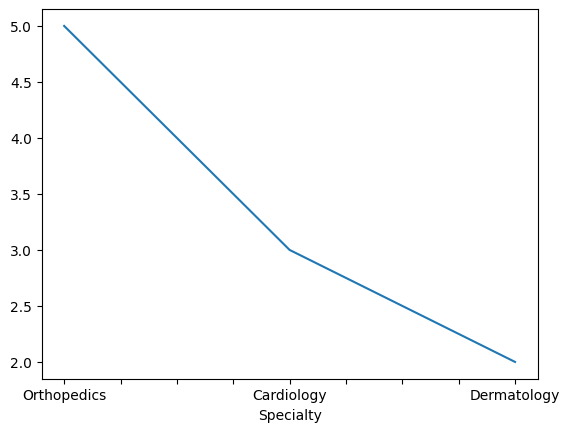

In [79]:
doctors_df.Specialty.value_counts().plot()

<Axes: xlabel='Specialty'>

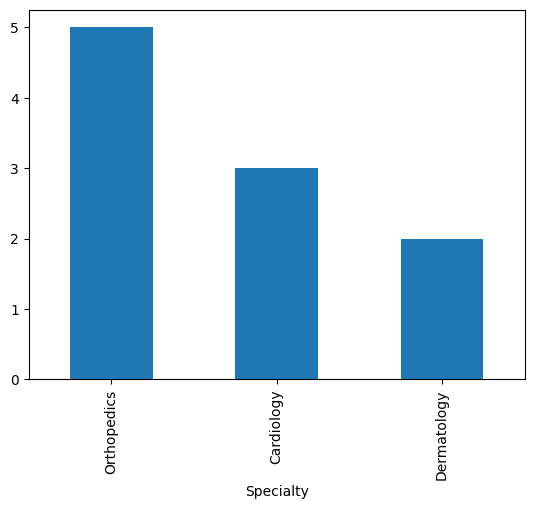

In [80]:
doctors_df.Specialty.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

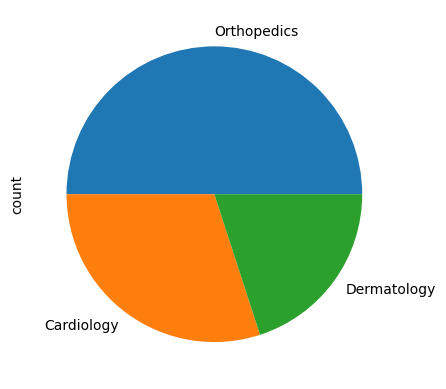

In [81]:
doctors_df.Specialty.value_counts().plot(kind='pie')

C:\Users\ghulam.ghaus\AppData\Local\Temp\ipykernel_13088\1500712514.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  doctors_df.groupby(['Specialty'])[['fee']].aggregate([min,max, np.mean]    ).plot(kind='bar')
C:\Users\ghulam.ghaus\AppData\Local\Temp\ipykernel_13088\1500712514.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  doctors_df.groupby(['Specialty'])[['fee']].aggregate([min,max, np.mean]    ).plot(kind='bar')
C:\Users\ghulam.ghaus\AppData\Local\Temp\ipykernel_13088\1500712514.py:1: FutureWarning: The provided callable <function mean at 0x0000027E5D8A2A20> is currently using SeriesGroupBy.mean. In a futur

<Axes: xlabel='Specialty'>

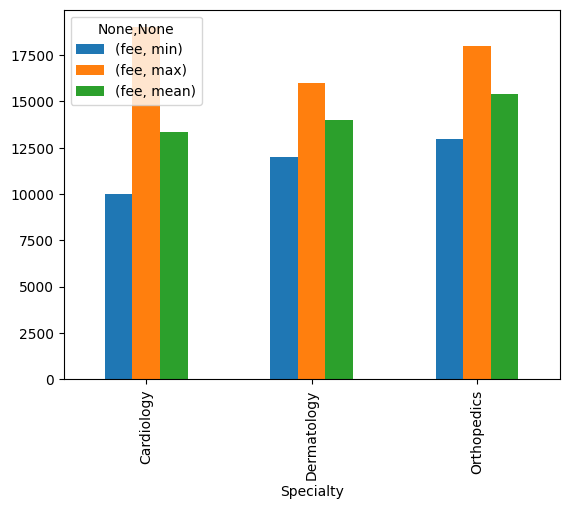

In [82]:


doctors_df.groupby(['Specialty'])[['fee']].aggregate([min,max, np.mean]    ).plot(kind='bar')



## Data Wraggling

   * .merge
   *  .join
   *  pd.concat([df1,df2])

## joining

   *  left join,
   *  right join
   *  inner join
   *  outer join
   *  cross join


In [83]:
import pandas as pd
from typing import Dict, Union, List, Iterator

from collections.abc import Iterator

# Sample data for the 'students' DataFrame
doctors_data : Dict[str,List[Union[str,int]]] = {
    'PatientId': [1, 2, 3, 4, 5],
    'PatientName': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'DoctorID': [101, 102, 103, 101, 102]
}
doctors : pd.DataFrame = pd.DataFrame(doctors_data)

# Sample data for the 'teachers' DataFrame
patient_data : Dict[str,List[Union[str,int]]] ={
    'DoctorID': [101, 102, 103],
    'Specialty':['Physics', 'Chem','Maths'],
    'DoctorName': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
patients = pd.DataFrame(patient_data)

# Sample data for the 'student_fees' DataFrame
patients_fees_data : Dict[str,List[Union[str,int]]] = {
    'DoctorID': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
patients_fees = pd.DataFrame(patients_fees_data)


## joining columns properties

   * same pattern of both columns

   * same data types of both columns

   * name can be different (columns)

   * Merg
      *  on
      * left_on
      *  right_on
      *  left_index=True
      *  right_index=True
    * how
          *  joining types
               * left
               * right
               * inner
               * outer
               * cross



In [87]:
doctors, 

(   PatientId PatientName  DoctorID
 0          1       Alice       101
 1          2         Bob       102
 2          3     Charlie       103
 3          4       David       101
 4          5         Eva       102,)

In [88]:
patients

,DoctorID,Specialty,DoctorName
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


In [89]:
patients_fees

,DoctorID,fee_paid
0,1,1500
1,2,1500
2,3,1500
3,4,1500
4,5,1500


In [90]:
doctors.info()
patients.info()
patients_fees.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PatientId    5 non-null      int64 
 1   PatientName  5 non-null      object
 2   DoctorID     5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DoctorID    3 non-null      int64 
 1   Specialty   3 non-null      object
 2   DoctorName  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   DoctorID  5 non-null      int64
 1   fee_paid  5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 

In [91]:
display(doctors)
display(patients)

,PatientId,PatientName,DoctorID
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,102


,DoctorID,Specialty,DoctorName
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


In [93]:


df1 : pd.DataFrame = pd.merge(patients, doctors)
df1



,DoctorID,Specialty,DoctorName,PatientId,PatientName
0,101,Physics,Mr. Smith,1,Alice
1,101,Physics,Mr. Smith,4,David
2,102,Chem,Ms. Johnson,2,Bob
3,102,Chem,Ms. Johnson,5,Eva
4,103,Maths,Dr. Lee,3,Charlie


In [94]:


display(doctors)
display(patients)

df1 : pd.DataFrame = pd.merge(patients, doctors, on="DoctorID")
print("Result")
df1



,PatientId,PatientName,DoctorID
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,102


,DoctorID,Specialty,DoctorName
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


Result


,DoctorID,Specialty,DoctorName,PatientId,PatientName
0,101,Physics,Mr. Smith,1,Alice
1,101,Physics,Mr. Smith,4,David
2,102,Chem,Ms. Johnson,2,Bob
3,102,Chem,Ms. Johnson,5,Eva
4,103,Maths,Dr. Lee,3,Charlie


In [95]:
pd.concat([doctors, patients, patients_fees], axis=1)

,PatientId,PatientName,DoctorID,DoctorID,Specialty,DoctorName,DoctorID,fee_paid
0,1,Alice,101,101.0,Physics,Mr. Smith,1,1500
1,2,Bob,102,102.0,Chem,Ms. Johnson,2,1500
2,3,Charlie,103,103.0,Maths,Dr. Lee,3,1500
3,4,David,101,NaN,NaN,NaN,4,1500
4,5,Eva,102,NaN,NaN,NaN,5,1500
